# 계산의 기본 요소(원자)들

양자 컴퓨터 프로그래밍은 이제 누구나 집에서 편안하게 할 수 있습니다.

하지만 무엇을 만들어야 할까요? 양자 프로그램이 뭘까요? 양자 컴퓨터란 대체 무엇일까요?

이러한 질문에 대한 대답은 표준 디지털 컴퓨터와의 비교에서 얻을 수 있습니다. 불행히도 대부분의 사람들은 실제로 디지털 컴퓨터가 어떻게 작동하는지 이해하지 못합니다. 이 글에서는 이런 장치들의 기본 원리를 먼저 살펴보고자 합니다. 이 강의에 이어서 여러분이 양자 컴퓨팅으로 쉽게 넘어 갈 수 있도록, 양자에서 사용되는 것과 동일한 도구를 사용하여 진행하겠습니다.

다음은 이 페이지의 코드 실행에 필수적으로 필요한 Python 라이브러리들을 실행합니다.

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

## 1. 정보를 비트 단위로 분할하기<a id="bits"></a>

가장 먼저 알아야 할 것은 비트 개념입니다. 비트는 세상에서 가장 단순한 문자로 설계되었습니다. 0과 1의 두 문자만으로 모든 정보를 나타낼 수 있으니까요.

수를 예로 들어 보겠습니다. 여러분은 아마 0, 1, 2, 3, 4, 5, 6, 7, 8, 9의 10개 숫자로 된 문자열로 수를 표현하는 데 익숙할 것입니다. 이 문자열의 각 숫자는 10의 특정 거듭제곱이 포함되는 횟수를 의미합니다. 예를 들어, 9213의 의미는 다음과 같습니다.

$$ 9000 + 200 + 10 + 3 $$

또는 10의 거듭제곱을 강조하는 방식으로 표현하면 아래와 같이 되겠죠.

$$ (9\times10^3) + (2\times10^2) + (1\times10^1) + (3\times10^0) $$

우리는 일반적으로 10을 기반으로 하는 수 체계를 사용하지만, 다른 숫자를 기반으로 하는 수 체계도 쉽게 사용할 수 있습니다. 예를 들어, 이진수 체계는 숫자 2를 기반으로 합니다. 이진수는 0과 1을 사용하여 수를 2의 배수로 표현하는 것을 의미합니다. 예를 들어, 9213은 10001111111101이 됩니다.

$$ \begin{aligned} 9213 &amp;= (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11}) + (0 \times 2^{10}) \ &amp;+ (1 \times 2^9) + (1 \times 2^8) + (1 \times 2^7) + (1 \times 2^6) \ &amp;+ (1 \times 2^5) + (1 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) \ &amp;+ (0 \times 2^1) + (1 \times 2^0) \end{aligned} $$

여기서 우리는 10, 100, 1000 등을 사용하는 대신 2, 4, 8, 16, 32 등 2의 거듭제곱으로 수를 표현합니다.


In [ ]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

이진 문자열로 알려진 이러한 비트 문자열은 수 외에도 더 많은 것을 표현하는 데 사용될 수 있습니다. 예를 들어, 비트를 사용해서 모든 종류의 텍스트를 표현할 수 있습니다. 문자나 수, 구두점 등 여러분이 나타내고 싶은 어떤 것이라도 [이 표](https://www.ibm.com/support/knowledgecenter/en/ssw_aix_72/com.ibm.aix.networkcomm/conversion_table.htm)에서 최대 8비트의 해당 문자열을 찾을 수 있습니다. 이것은 매우 임의적이기는 하지만, 보편적으로 합의된 표준입니다. 인터넷을 통해 여러분들께 이 글을 전달하는 데에도 사용된 방법이죠.

이것이 모든 정보가 컴퓨터에서 표현되는 방식입니다. 숫자든, 문자든, 이미지든, 소리든, 모두 이진 문자열의 형태로 존재합니다.

우리의 표준 디지털 컴퓨터와 마찬가지로 양자 컴퓨터도 이와 동일한 기본 아이디어를 기반으로 합니다. 주요 차이점은 양자 역학에 대한 비트의 확장인 *큐비트* 를 사용한다는 것입니다. 우리는 이 교재의 나머지 부분에서 큐비트가 무엇인지, 큐비트가 무엇을 할 수 있고, 어떻게 하는지에 대해 배우게 됩니다. 하지만, 이번 섹션에서는 양자에 대해 전혀 이야기하지 않고 마치 큐비트를 비트인 것처럼 사용할 것입니다.

<!-- ::: q-block.exercise -->

## 연습

다음 문장을 완성하세요:

1. 십진수 "5"는 이진수로 [[101|11001|110|001]]입니다.
2. 컴퓨터에 1비트가 있으면 [[2|1|3|4]] 개의 다른 상태를 표현할 수 있습니다.
3. 컴퓨터에 2비트가 있으면 [[4|3|2|8]] 개의 다른 상태를 표현할 수 있습니다.
4. 컴퓨터에 8비트가 있는 경우 [[256|128|342]]개의 다른 상태를 표현할 수 있습니다.
5. $n$ 비트가 있는 경우 [[$2^n$|$n×2$|$n^2$]] 개의 다른 상태를 표현할 수 있습니다.

<!-- ::: -->


## 2. 다이어그램으로 계산하기<a id="diagram"></a>

큐비트를 사용하든 비트를 사용하든 관계없이 우리가 가지고 있는 입력 정보를 우리가 필요로 하는 출력 정보로 바꾸려면 비트를 조작해야 합니다. 비트 수가 매우 적은 간단한 프로그램의 경우, 이 프로세스를 *회로도* 라고 하는 다이어그램으로 표현하는 것이 유용합니다. 회로도의 왼쪽에 입력이 있고 오른쪽에는 출력이 있으며 그 사이에 신비한 기호로 표시되는 작업이 있습니다. 이러한 작업을 '게이트'라고 부르는데, 여기에는 역사적 이유가 있습니다.

다음은 표준 비트 기반 컴퓨터에서 회로가 어떻게 보이는 지에 대한 예입니다. 회로가 무엇을 하는 것인지 이해할 필요는 없습니다. 그냥 회로가 어떻게 생겼는지만 보여드리려는 거니까요.

![이미지1](images/classical_circuit.png)

양자 컴퓨터의 경우, 기본적으로 이와 동일한 아이디어를 사용하고 있지만 작업에 사용되는 입력, 출력, 기호를 나타내는 방법에 대한 규칙이 다릅니다. 다음은 위에서 보여드린 예시와 동일한 프로세스를 나타내는 양자회로입니다.

![이미지2](images/quantum_circuit.png)

이 문서의 나머지 부분에서는 회로를 구축하는 방법을 설명합니다. 마지막으로 위의 회로를 어떻게 만드는지, 회로가 어떤 일을 수행하는지, 이것이 왜 유용한지를 배우게 될 것입니다.

## 3. 첫 번째 양자 회로 만들기<a id="first-circuit"></a>

회로에서는 일반적으로 세 가지 작업을 수행해야 합니다. 먼저 입력을 인코딩한 다음, 실제 계산을 수행하고 마지막으로 출력을 추출합니다. 첫 번째 양자 회로의 경우 이 작업의 마지막 부분에 초점을 맞춥니다. 이제 8개의 큐비트와 8개의 출력이 있는 회로를 만드는 것에서 시작해 보겠습니다.

In [3]:
qc_output = QuantumCircuit(8)

code0}qc_output 회로는, Qiskit의 `QuantumCircuit`을 사용해 만들어졌습니다. `QuantumCircuit`은 양자 회로에 사용되는 큐비트의 수를 전달 인자로 사용합니다.

양자 회로의 출력은 `measure_all()` 이라는 명령어을 사용하여 추출됩니다. 각 측정 명령어는 특정 큐비트의 측정 결과를 정해진 출력 비트에 제공되게 합니다. `qc_output.measure_all()` 명령은 `qc_output` 회로의 각 큐비트의 측정값을 출력을 기록할 일부 클래식 비트에 기록하게 합니다.

In [4]:
qc_output.measure_all()

이제 회로에 무언가가 있으므로 살펴보겠습니다.

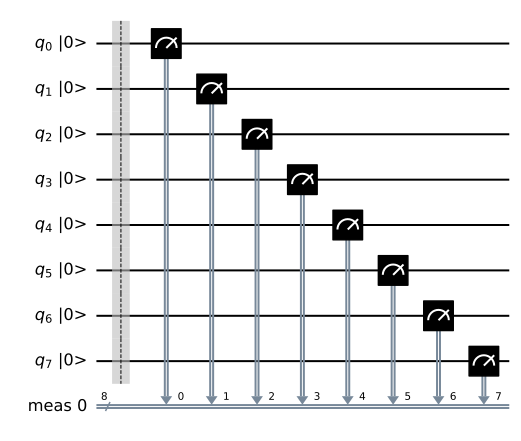

In [5]:
qc_output.draw(initial_state=True) 

큐비트는 항상 `0` 을 출력하도록 초기화됩니다. 위의 회로에서는 큐비트에 아무 일도 하지 않았기 때문에 이것이 바로 큐비트를 측정할 때 얻을 수 있는 결과입니다. 회로를 여러 번 실행하고 결과를 히스토그램으로 표시하면 이것을 확인할 수 있습니다. 결과는 항상 `00000000` : 각 큐비트의 값이 `0` 임을 알 수 있습니다.

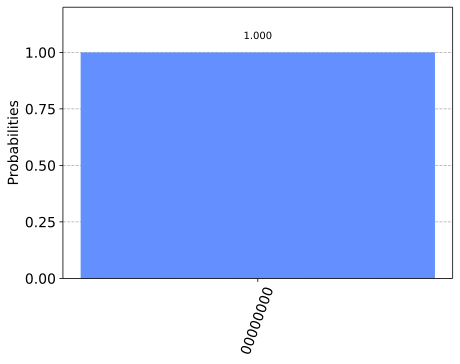

In [6]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

여러 번 실행하고 결과를 히스토그램으로 표시하는 이유는 양자 컴퓨터의 결과에 임의성이 있을 수 있기 때문입니다. 위의 경우 양자에 어떤 일도 하지 않았기 때문에 `00000000`  결과를 확실하게 얻습니다.

이 결과는 양자 시뮬레이터를 통해 얻은 것인데요. 양자 시뮬레이터는 이상적인 양자 컴퓨터가 수행하는 것처럼 계산하는 표준 컴퓨터입니다. 시뮬레이션은 적은 수의 큐비트(~30큐비트)에 대해서만 가능하지만, 그럼에도 불구하고 첫 번째 양자 회로를 설계할 때 매우 유용한 도구입니다. 실제 장치에서 실행하려면 `Aer.get_backend('aer_simulator')`  를 여러분이 사용하려는 장치의 백엔드 객체로 바꾸기만 하면 됩니다. 

## 4. 예제: 가산기 회로 생성<a id="adder"></a>

### 입력 인코딩<a id="encoding"></a>

이제 다른 이진 문자열을 입력으로 인코딩하는 방법을 살펴보겠습니다. 이를 위해 NOT 게이트라는 것이 필요합니다. 이는 컴퓨터에서 할 수 있는 가장 기본적인 작업입니다. 비트 값을 단순히 뒤집는 거죠. `0` 은 `1` 이 되고 `1` 은 `0` 이 됩니다. 큐비트의 경우 NOT 작업을 수행하는 것은 `x` 라는 작업입니다.

아래에서 인코딩 작업 전용의 새 회로를 만들고 <code>qc_encode</code> 라고 부르겠습니다. 지금은 큐비트 수만 지정합니다.

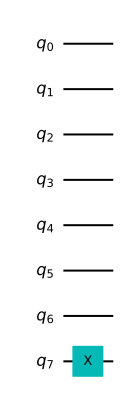

In [7]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

결과 추출은 이전의 `qc_output` 회로를 사용합니다.

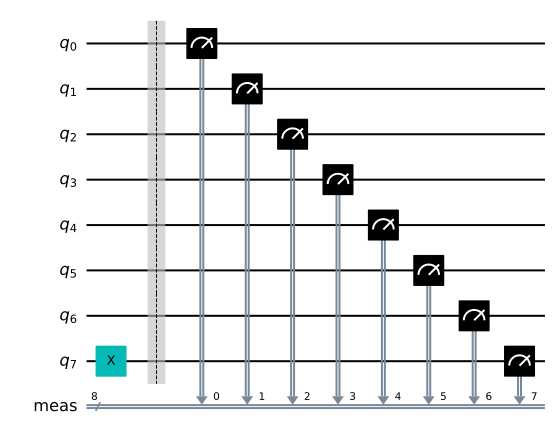

In [8]:
qc_encode.measure_all()
qc_encode.draw()

이제 결합된 회로를 실행하고 결과를 볼 수 있습니다.

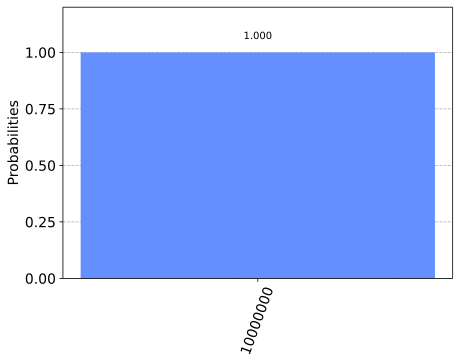

In [9]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

이제 컴퓨터는 문자열 `10000000` 을 출력합니다.

큐비트 7에서 가져온 뒤집은 비트는 문자열의 맨 왼쪽에 있습니다. 이것은 Qiskit이 문자열의 비트를 오른쪽에서 왼쪽으로 번호를 매기기 때문입니다. 일부 다른 시스템에서는 비트에 다른 방식으로 번호를 매기는 것을 선호하지만, Qiskit의 방식은 비트를 사용하여 숫자를 나타낼 때 확실히 장점이 있습니다. 특히, 큐비트 7은 우리의 수에 `2^7` 이 몇 개 있는지를 의미합니다. 따라서, 이 비트를 뒤집어서 8비트 컴퓨터에서의 수 [[128|256|64|32]]를 만들 수 있습니다.

이제 다른 수를 만들어 볼까요. 예를 들어, 여러분의 나이를 표현해 보죠. 검색 엔진을 사용하여 나이에 해당하는 숫자가 이진법으로 어떻게 표기되는지 알아낸 다음( ‘0b’가 포함되어 있으면 무시해도 됩니다), 128세 미만인 경우 왼쪽에 0을 추가하십시오.

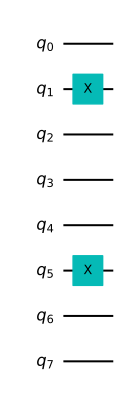

In [10]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw()

이제 우리는 컴퓨터에서 정보를 인코딩하는 방법을 알게 되었습니다. 다음 단계는 그것을 처리하는 것입니다. 인코딩한 입력을 받아 그것을 우리가 필요로 하는 출력으로 바꾸는 것입니다.

### 4.2 덧셈 방법 기억하기<a id="remembering-add"></a>

입력을 출력으로 바꾸는 것을 알아 보기 위해, 우리가 해결할 문제가 먼저 있어야 겠네요. 기본적인 수학을 해봅시다. 초등학교에서 당신은 큰 수학 문제를 다룰 때 작은 조각으로 나누는 방법을 배웠을 것입니다. 예를 들어, 다음 문제를 해결하려면 어떻게 하시겠습니까?

```code
   9213
+  1854
=  ????
```

한 가지 방법은 오른쪽에서 왼쪽으로, 숫자 단위로 계산하는 것이죠. 그래서 우리는 3+4로 시작하겠습니다.

```code
   9213
+  1854
=  ???7
```

그러고 나서 1+5 를 합니다.

```code
   9213
+  1854
=  ??67
```

그 다음 2+8=10이 됩니다. 이것은 두 자리 값이므로 하나를 다음 열로 옮겨야 합니다.

```code
   9213
+  1854
=  ?067
   ¹
```

마지막으로 9+1+1=11 을 하고 답을 얻습니다.

```code
   9213
+  1854
=
   ¹
```

이것은 단순한 덧셈일 수 있지만 모든 알고리즘의 원리를 보여줍니다. 알고리즘이 수학 문제를 해결하든 텍스트나 이미지를 처리하도록 설계되었든 관계없이 우리는 항상 큰 작업을 작고 간단한 작업으로 나눕니다.

컴퓨터에서 실행하려면, 알고리즘을 가능한 가장 작고 간단한 작업으로 컴파일해야 합니다. 이것이 어떤 의미인지 이해하기 위해 위의 덧셈 문제를 이진법으로 다시 해봅시다.

```code
   1000
+  000
                                    
=  ??????????????
```

두 번째 숫자의 왼쪽에는 여분의 0이 많이 있습니다. 이것은 두 문자열을 같은 길이로 만드는 역할을 합니다.

첫 번째 작업은 오른쪽 열에 대해 1+0을 수행하는 것입니다. 모든 수 체계에서와 마찬가지로 이진법에서의 답도 1입니다. 두 번째 열의 0+1에 대해서도 동일한 결과를 얻습니다.

```code
   10001111111101
+  00011100111110

=  ????????????11
```

다음은 1+1입니다. 아시다시피 1+1=2입니다. 이진법에서 숫자 2는 `10` 으로 쓰여지므로 2비트가 필요합니다. 이것은 10진수의 숫자 10과 마찬가지로 1을 다음 열로 전달해야 함을 의미합니다.

```code
   10001111111101
+  00011100111110
=  ???????????011
             ¹
```

다음 열에서는 이제 `1+1+1` 을 계산해야 합니다. 세 개의 숫자를 더해야 하므로 컴퓨터에게는 더 복잡해진거죠. 하지만, 우리는 이것을 더 간단한 작업으로 컴파일할 수 있습니다. 즉, 두 비트를 더하는 방식으로 처리할 수 있는거죠. 우선 처음 두 개의 1로 시작할 수 있습니다.

```code
   1
+  1
= 10
```

이제 이 `10` 을 마지막 숫자인 `1` 에 추가해야 합니다. 이는 열을 통과하는 일반적인 방법을 사용하여 수행할 수 있습니다.

```code
  10
+ 01
= 11
```

최종 답은 <code>11</code> (3이라고도 함)입니다.

이제 나머지 문제로 돌아갈 수 있습니다. <code>11</code> 의 답으로 다른 캐리 비트가 있습니다.

```code
   10001111111101
+  00011100111110
=  ??????????1011
            ¹¹
```

이제 우리는 또 다른 1+1+1을 해야 합니다. 그러나 우리는 이미 어떻게 하는지 알고 있으므로 큰 문제는 아닙니다.

이제 남은 모든 일은 우리가 이미 방법을 알고 있는 것들입니다. 모든 것을 2비트씩 더하는 것으로 단계를 나누게 되면 계산해야 할 항목은 4개 뿐입니다. 다음은 4가지 기본 합계입니다(일관성을 위해 모두 2비트로 작성했습니다).

```code
0+0 = 00 (in decimal, this is 0+0=0)
0+1 = 01 (in decimal, this is 0+1=1)
1+0 = 01 (in decimal, this is 1+0=1)
1+1 = 10 (in decimal, this is 1+1=2)
```

이것을 *반가산기(Half adder)* 라고 합니다. 컴퓨터가 이것을 구현할 수 있고, 연속해서 병렬로 연결할 수 있으면 무엇이든 더할 수 있습니다.

### 4.3 Qiskit으로 덧셈하기<a id="adding-qiskit"></a>

Qiskit을 사용하여 우리만의 반가산기를 만들어 봅시다. 여기에는 입력을 인코딩하는 회로 부분, 알고리즘을 실행하는 부분과 결과를 추출하는 부분이 포함됩니다. 첫 번째 부분은 새 입력을 사용하고 싶을 때마다 변경해야 하지만 나머지 부분은 항상 동일하게 유지됩니다.

![양자 회로에 구현된 반가산기](images/half-adder.svg)


더하려는 두 비트는 큐비트 0과 1로 인코딩됩니다. 위의 예는 이 두 큐비트에서 모두 `1` 을 인코딩하므로 `1+1` 의 해를 찾습니다. 결과는 큐비트 2와 3에서 읽을 2비트 문자열이며 0 또는 1의 값의 고전 비트로 저장됩니다.

컴퓨팅의 기본 작업은 논리 게이트로 알려져 있습니다. 우리는 이미 NOT 게이트를 사용했지만 우리의 반가산기를 만들기에는 충분하지 않았습니다. 답을 수동으로 작성하는 데만 사용할 수 있었습니다. 우리는 컴퓨터가 우리를 위해 실제 컴퓨팅을 해주기를 원하기 때문에 더 강력한 게이트가 필요합니다.

필요한 것이 무엇인지 알아보기 위해 반가산기가 무엇을 해야 하는지 다시 살펴보겠습니다.

```code
0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10
```

이 네 가지 답변 모두에서 가장 오른쪽 비트는 우리가 더하는 두 비트가 같은지 다른지에 따라 완전히 결정됩니다. 따라서 두 비트가 동일한 `0+0` 과 `1+1` 의 경우 답의 가장 오른쪽 비트가 [[0|1]]이 됩니다. 서로 다른 비트 값을 추가하는 `0+1` 및 `1+0` 의 경우 맨 오른쪽 비트는 [[1|0]]입니다.

솔루션의 이 부분을 정확하게 하려면, 두 비트가 다른지 여부를 파악할 수 있는 무언가가 필요합니다. 전통적인 디지털 계산 연구에서는 이것을 [XOR 게이트](gloss:xor) 라고 합니다.

입력 1 | 입력 2 | XOR 출력
:-: | :-: | :-:
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 0

양자 컴퓨터에서 XOR 게이트 작업은 Controlled-NOT 게이트에 의해 수행됩니다. 이름이 꽤 길기 때문에 보통 그냥 CNOT라고 부릅니다. Qiskit에서는 더 짧게 `cx` 로 씁니다. 회로도에서는 아래 그림과 같이 그려집니다.

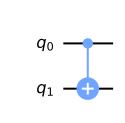

In [11]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

이 게이트는 한쌍의 큐비트에 작용합니다. 하나의 큐비트는 제어 큐비트(작은 점으로 표현됨)입니다. 다른 하나는 *대상 큐비트* (거다란 원 속에 `+` 기호)입니다.

CNOT의 효과를 설명하는 방법에는 여러 가지가 있습니다. 하나는 두 개의 입력 비트(제어 큐비트)가 같은지 다른지 확인하는 것입니다. 다음으로 대상 큐비트를 정답으로 덮어씁니다. 대상 큐비트는 입력 비트가 서로 같으면 `0` 이 되고, 다르면 `1` 이 됩니다.


<img src="images/cnot_xor.svg">

CNOT를 설명하는 또 다른 방법은 제어 큐비트가 `1` 이면 대상 큐비트에 대해 NOT을 수행하고 그렇지 않으면 아무 작업도 수행하지 않는다고 말하는 것입니다. 이 설명은 위에서 얘기한 설명과 마찬가지로 타당합니다(사실, 게이트에 이런 이름이 붙여진 것과 관련된 설명입니다).

가능한 모든 입력 큐비트에 CNOT을 직접 실행해 보세요. 예를 들어, 다음은 입력 `01` 로 CNOT를 테스트하는 회로입니다.

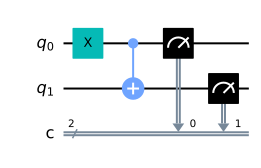

In [12]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

이 회로를 실행하면 출력값이 `11` 이 됩니다. 이러한 일이 발생한 이유는 다음 중 하나라고 생각할 수 있습니다.

- CNOT은 입력 값이 다른지 여부를 확인하고, 값이 서로 다르므로 `1` 을 출력합니다. 큐비트 1(비트 문자열의 왼쪽에 있음)의 상태를 이 값으로 덮어쓰면 `01` 이 `11` 로 변경됩니다.

- CNOT는 큐비트 0이 상태 `1` 에 있음을 확인하므로 큐비트 1에 NOT을 적용합니다. 이것은 큐비트 1의 `0` 을 `1` 로 뒤집고 `01` 을 `11` 로 바꿉니다.

다음은 CNOT 게이트의 가능한 모든 입력과 해당 출력을 보여주는 표입니다.

입력(q1 q0) | 출력(q1 q0)
:-: | :-:
00 | 00
01 | 11
10 | 10
11 | 01

반가산기의 경우, 입력값을 덮어쓰고 싶지 않습니다. 대신 다른 큐비트 쌍에 결과를 기록하기를 원합니다. 이를 위해 두 개의 CNOT를 사용할 수 있습니다.

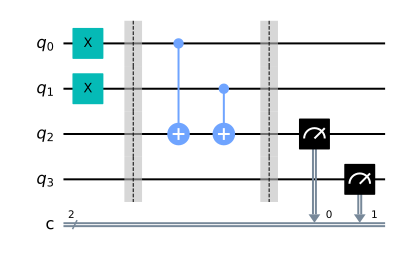

In [13]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

이제 완전히 작동하는 반가산기를 절반정도 구현했습니다. 이제 출력을 위한 비트만 남았습니다. 큐비트 3을 사용합니다.

네 가지 가능한 합계를 다시 보면 `0` 대신 `1` 인 경우가 하나뿐이라는 것을 알 수 있습니다 : `1+1` = `10`. 우리가 더하려는 두 비트가 모두 `1` 일 때만 발생합니다.

이 부분을 계산하기 위해, 컴퓨터는 두 입력이 모두 `1` 인지 여부를 확인할 수 있어야 합니다. 그럴 때만 큐비트 3에 NOT 게이트를 수행하도록 합니다. 그러면 이 경우에만 우리가 필요한 값인 `1` 로 반전되어 필요한 출력을 얻을 수 있습니다.

이를 위해 우리는 새로운 게이트가 필요합니다. CNOT처럼 하나의 큐비트가 아닌 두 개의 큐비트로 제어됩니다. 두 컨트롤이 모두 상태 `1` 때만 대상 큐비트에서 NOT을 수행합니다. 이 새로운 게이트를 [Tofffoli](gloss:toffoli) 라고 합니다. 부울 논리 게이트에 익숙한 분들에게는 기본적으로 AND 게이트와 같은 것입니다.

Qiskit에서 Tofffoli는 `ccx` 명령으로 표시됩니다.

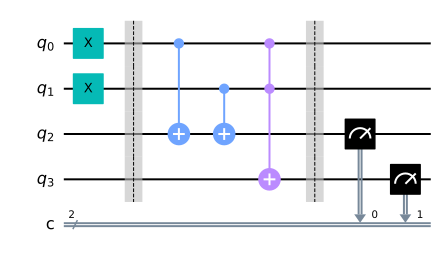

In [14]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

이 예에서는 2개의 입력 비트가 모두 `1` 이므로 `1+1` 을 계산합니다. 우리가 얻는 것을 봅시다.

/home/divs/.local/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


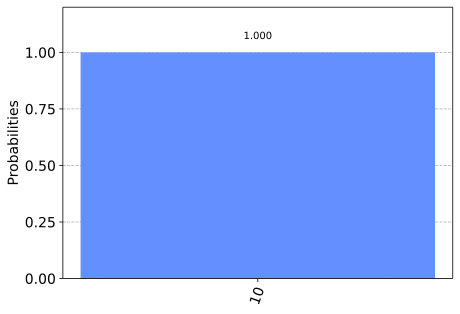

In [15]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

결과는 숫자 2의 이진 표현인 `10` 입니다. 우리는 1+1이라는 유명한 수학 문제를 풀 수 있는 컴퓨터를 만들었습니다!

이제 다른 세 가지 가능한 입력으로 시도해 보고 우리 알고리즘이 해당 입력에도 올바른 결과를 제공한다는 것을 보여줄 수 있습니다.

반가산기에는 덧셈에 필요한 모든 것이 들어 있습니다. NOT, CNOT, Toffoli 게이트를 사용하여 어떤 크기의 숫자라도 더할 수 있는 프로그램을 만들 수 있습니다.

이 세 가지 게이트는 다른 컴퓨팅 작업을 수행하기에도 충분합니다. 사실, 우리는 CNOT 없이도 할 수 있습니다. 실제로 NOT 게이트는 값이 `1` 인 비트를 생성하는 데만 필요합니다. Toffoli 게이트는 본질적으로 수학에서 원자와 같습니다. 다른 모든 문제 해결 기술을 컴파일할 수 있는 가장 간단한 요소니까요.

앞으로 보게 되겠지만, 양자 컴퓨팅에서는 이 원자를 더 작게 나눕니다.

In [16]:
import qiskit.tools.jupyter
%qiskit_version_table

/home/divs/.local/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
